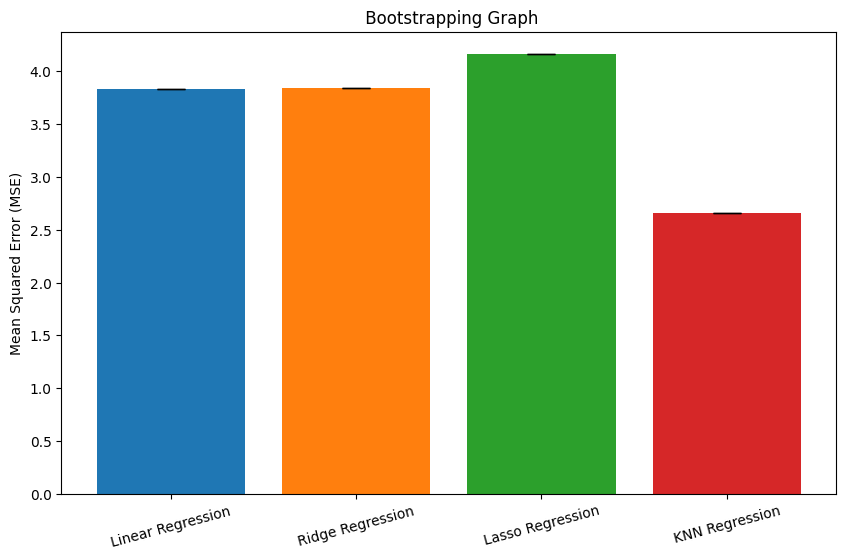

Linear With boot strap: [3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.835865617910826, 3.8358

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/archive.zip")

# Assuming you have combined your data into a DataFrame named 'df'
# Split the data into X (features) and y (target variable)
X = df.iloc[:, :-1]  # Assuming the last column is your target variable
y = df.iloc[:, -1]

# Number of bootstrap samples
n_bootstrap_samples = 100

# Initialize lists to store the bootstrapped models and their errors
linear_reg_models = []
ridge_models = []
lasso_models = []
knn_models = []

linear_reg_mses = []
ridge_mses = []
lasso_mses = []
knn_mses = []

for _ in range(n_bootstrap_samples):
    # Bootstrap resampling
    X_resampled, y_resampled = resample(X, y, random_state=42)

    # Create and train a Linear Regression model
    linear_reg_model = LinearRegression()
    linear_reg_model.fit(X_resampled, y_resampled)
    linear_reg_models.append(linear_reg_model)

    # Create and train a Ridge Regression model
    ridge_model = Ridge(alpha=1.0)  # You can choose the alpha parameter
    ridge_model.fit(X_resampled, y_resampled)
    ridge_models.append(ridge_model)

    # Create and train a Lasso Regression model
    lasso_model = Lasso(alpha=1.0)  # You can choose the alpha parameter
    lasso_model.fit(X_resampled, y_resampled)
    lasso_models.append(lasso_model)

    # Create and train a K-Nearest Neighbors (KNN) Regression model
    knn_model = KNeighborsRegressor(n_neighbors=5)  # You can choose the number of neighbors
    knn_model.fit(X_resampled, y_resampled)
    knn_models.append(knn_model)

    # Calculate and store the Mean Squared Error (MSE) for each model
    linear_reg_predictions = linear_reg_model.predict(X)
    linear_reg_mse = mean_squared_error(y, linear_reg_predictions)
    linear_reg_mses.append(linear_reg_mse)

    ridge_predictions = ridge_model.predict(X)
    ridge_mse = mean_squared_error(y, ridge_predictions)
    ridge_mses.append(ridge_mse)

    lasso_predictions = lasso_model.predict(X)
    lasso_mse = mean_squared_error(y, lasso_predictions)
    lasso_mses.append(lasso_mse)

    knn_predictions = knn_model.predict(X)
    knn_mse = mean_squared_error(y, knn_predictions)
    knn_mses.append(knn_mse)

# Create a bar chart to visualize the MSE values
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'KNN Regression']
mse_values = [linear_reg_mses, ridge_mses, lasso_mses, knn_mses]

plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.bar(models[i], np.mean(mse_values[i]), yerr=np.std(mse_values[i]), capsize=10)

plt.title(' Bootstrapping Graph')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=15)
plt.show()

# Print the MSE values for each model
print("Linear With boot strap:", linear_reg_mses)
print("Ridge With boot strap:", ridge_mses)
print("Lasso With boot strap:", lasso_mses)
print("KNN With boot strap:", knn_mses)
